In [8]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym
import tiles3 as tc
from agents import QAgent, SarsaAgent, SarsaLambdaAgent

from IPython.display import clear_output

In [2]:
class TileCoder:

    def __init__(self, iht_size):
        self.iht = tc.IHT(iht_size)
        self.num_tiles = 6
        self.num_tilings = 12

    def get_tiles(self, state):
        position, velocity, angle, angular = state
        position *= self.num_tiles / 4.8
        velocity *= self.num_tiles / 6
        angle *= self.num_tiles / 0.419
        angular *= self.num_tiles / 12
        tiles = tc.tiles(self.iht, self.num_tilings, [position, velocity, angle, angular])
        return np.array(tiles)

In [15]:
def plot(num_steps_list):
    plt.figure(figsize=(5, 4))
    plt.plot(num_steps_list, color='royalblue')
    plt.title('CartPole-v1')
    plt.grid(alpha=0.2)
    plt.xlabel('episode')
    plt.ylabel('num_steps')
    plt.show()

In [27]:
env = gym.make('CartPole-v1')
tilecoder = TileCoder(iht_size=16384)

# agent = QAgent(num_actions=2, tilecoder=tilecoder)
agent = SarsaAgent(num_actions=2, tilecoder=tilecoder)
# agent = SarsaLambdaAgent(num_actions=2, tilecoder=tilecoder)
agent.epsilon = 0.1
agent.gamma = 1.0
agent.alpha = 0.2 / 12
# agent.lambd = 0.9
num_steps_list = []

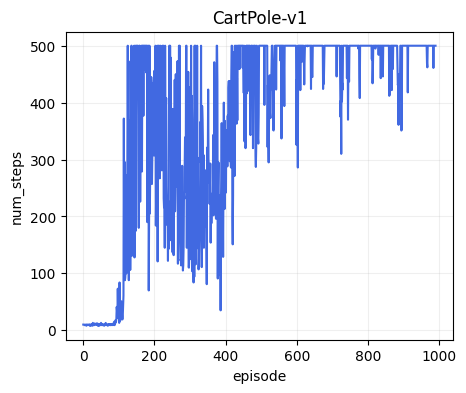

In [24]:
num_episodes = 1000
plot_episode = 10

for episode in range(num_episodes):
    state, _ = env.reset()
    action = agent.start(state)
    done, win = False, False
    num_steps = 0
    while not done:
        state, reward, done, win, _ = env.step(action)
        action = agent.step(state, reward)
        num_steps += 1
        if done or win:
            agent.end(reward)
            break

    if episode > 500:
        agent.epsilon = 0.0
        agent.alpha = 0.1 / 12
        
    num_steps_list.append(num_steps)
    if episode % plot_episode == 0:
        plot(num_steps_list)
        clear_output(wait=True)